In [1]:
# Imports 
import pandas as pd
import helper as hp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('classic')

In [2]:
# Load data 
df = pd.read_csv('../data/clean_lvl1.csv')

# data description 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         1999 non-null   float64
 1   date           1999 non-null   object 
 2   comment_count  1999 non-null   int64  
 3   name           1999 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 62.6+ KB


### Columns 
|Column Name | Data Type | 
|------------|-----------|
|rating | float|
|date | date|
|comment_count| int|
|name|string|

### Name 

In [3]:
# Name Column: All lower case 
df['name'] = df['name'].apply(hp.lower)

In [4]:
# Name Column: Remove review from names 
df['name'] = df['name'].str.replace('review', '')

In [5]:
# Make string type
df['name'] = df['name'].astype('string')

### Date 

In [6]:
# Make date column a date dtype
df['date'] = df['date'].astype('datetime64[ns]')
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rating         1999 non-null   float64       
 1   date           1999 non-null   datetime64[ns]
 2   comment_count  1999 non-null   int64         
 3   name           1999 non-null   string        
dtypes: datetime64[ns](1), float64(1), int64(1), string(1)
memory usage: 62.6 KB


### Make new columns 

In [8]:
# Seperate date into months and year 
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

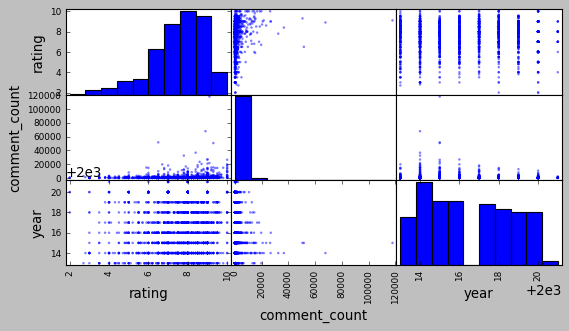

In [9]:
plt.style.use('_classic_test_patch')
_ = pd.plotting.scatter_matrix(df[['rating', 'comment_count', 'year']], figsize = (8, 4), diagonal = 'hist')

In [10]:
# List of console types 
df['console'] = df['name'].apply(hp.console)

In [11]:
# quantiles of rating and comments 
qrate = df['rating'].describe()[4:]
qccount = df['comment_count'].describe()[4:]

### Quantiles

|column|min|25%|50%|75%|max|
|------|---|---|---|---|---|
|rating|2|6.8|7.8|8.5|10|
|comment count|0|36|184|670|117881|

In [17]:
# Bin Ratings
hp.set_bin_level(6.8, 8.5, 8.6)
df['rate_rank'] = df['rating'].apply(hp.bin_)

In [18]:
# Bin comments 
hp.set_bin_level(36, 670, 671)
df['comment_rank'] = df['comment_count'].apply(hp.bin_)

In [33]:
df

,rating,date,comment_count,name,month,year,console,comment_rank,rate_rank
0,9.0,2021-02-17,84,valheim early access,2,2021,unknown,medium,high
1,8.0,2021-02-11,74,ys ix: monstrum nox,2,2021,unknown,medium,medium
2,7.0,2021-02-10,1291,super mario 3d world + bowser’s fury,2,2021,unknown,high,medium
3,8.0,2021-02-09,377,persona 5 strikers,2,2021,unknown,medium,medium
4,7.0,2021-02-09,117,little nightmares 2,2,2021,unknown,medium,medium
...,...,...,...,...,...,...,...,...,...
1994,8.2,2013-08-05,2,brothers: a tale of two sons,8,2013,unknown,low,medium
1995,4.3,2013-08-05,0,rise of the triad,8,2013,unknown,low,low
1996,8.0,2013-08-05,1,tales of xillia,8,2013,unknown,low,medium
1997,8.5,2013-07-31,0,dragon’s crown,7,2013,unknown,low,high
